<a href="https://colab.research.google.com/github/RP272/Red-Wine-Quality-Regression/blob/main/Red_Wine_Quality_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print("Red Wine Quality Regression")

Red Wine Quality Regression


# Get the data


In [81]:
import pandas as pd
import os

def load_red_wine_data(dataset_path):
  csv_path = os.path.join(dataset_path, "winequality-red.csv")
  return pd.read_csv(csv_path)

In [82]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/red-wine-quality-cortez-et-al-2009")

red_wine_data = load_red_wine_data(path)
red_wine_data.head()

Using Colab cache for faster access to the 'red-wine-quality-cortez-et-al-2009' dataset.


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Display dataset description

In [83]:
red_wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [84]:
red_wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


As shown by the *describe* function, all attributes have defined values for every entry in the dataset. Therefore data cleaning will not include filling empty spaces.

# Display dataset histogram

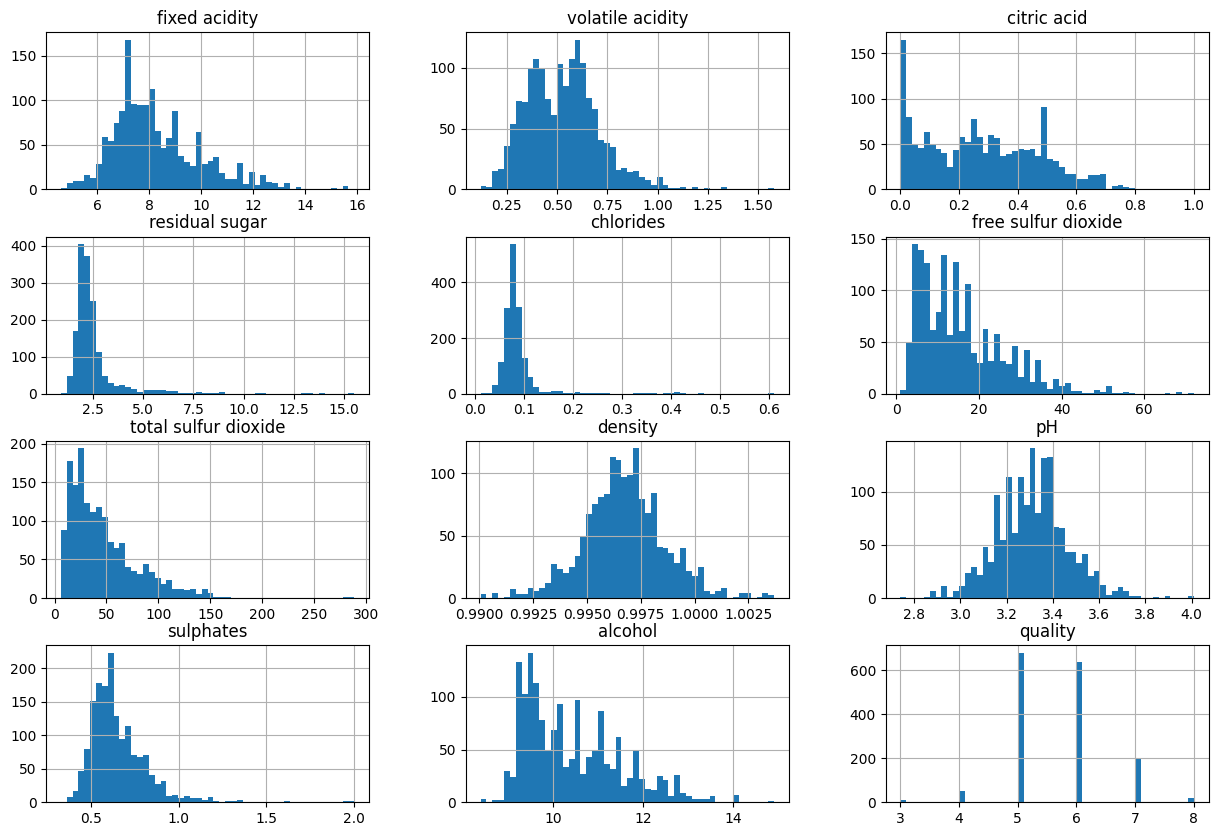

In [85]:
%matplotlib inline
import matplotlib.pyplot as plt
red_wine_data.hist(bins=50, figsize=(15,10))
plt.show()

# Create test set

In the case of this dataset, I have decided to create the test set with the use of *train_test_split* function. The reason behind this decision, is that I have no real clue, which wine attribute might be the most important when it comes to the final quality score. Therefore the use of stratified sampling was abandoned.

In [86]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(red_wine_data, test_size=0.2, random_state=42)

red_wine_data = train_set.copy()

# Check for correlations

In [87]:
corr_matrix = red_wine_data.corr()
corr_matrix["quality"].sort_values(ascending=False)

,quality
quality,1.000000
alcohol,0.472676
sulphates,0.242596
citric acid,0.216115
fixed acidity,0.122488
residual sugar,0.005425
pH,-0.045185
free sulfur dioxide,-0.055860
chlorides,-0.126541
density,-0.167091


Interesting fact that the highest correlation is between wine quality and alcohol 🤔🤔🤔

array([[<Axes: xlabel='quality', ylabel='quality'>,
        <Axes: xlabel='alcohol', ylabel='quality'>,
        <Axes: xlabel='sulphates', ylabel='quality'>,
        <Axes: xlabel='citric acid', ylabel='quality'>],
       [<Axes: xlabel='quality', ylabel='alcohol'>,
        <Axes: xlabel='alcohol', ylabel='alcohol'>,
        <Axes: xlabel='sulphates', ylabel='alcohol'>,
        <Axes: xlabel='citric acid', ylabel='alcohol'>],
       [<Axes: xlabel='quality', ylabel='sulphates'>,
        <Axes: xlabel='alcohol', ylabel='sulphates'>,
        <Axes: xlabel='sulphates', ylabel='sulphates'>,
        <Axes: xlabel='citric acid', ylabel='sulphates'>],
       [<Axes: xlabel='quality', ylabel='citric acid'>,
        <Axes: xlabel='alcohol', ylabel='citric acid'>,
        <Axes: xlabel='sulphates', ylabel='citric acid'>,
        <Axes: xlabel='citric acid', ylabel='citric acid'>]], dtype=object)

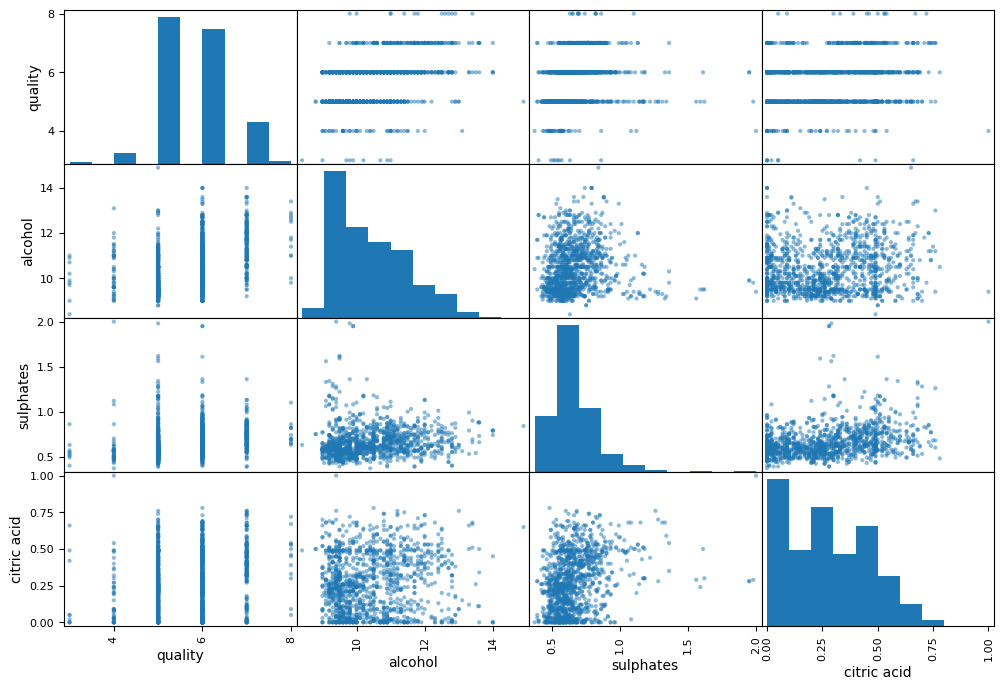

In [88]:
from pandas.plotting import scatter_matrix
attributes = ["quality", "alcohol", "sulphates", "citric acid"]

scatter_matrix(red_wine_data[attributes], figsize=(12,8))

# Transform data

No combinations of attributes were defined as well as no data imputers were created. Therefore the only transformation applied will impact feature scaling. For this purpose *StandardScaler* class will be used. Only input features will be scaled, omitting the target *quality* parameter with the use of *passthrough* parameter value.



In [89]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

red_wine_data = train_set.drop("quality", axis=1)
red_wine_labels = train_set["quality"].copy()

full_pipeline = ColumnTransformer([
  ("input", StandardScaler(), list(red_wine_data))
])

red_wine_data_prepared = full_pipeline.fit_transform(red_wine_data)

# Train models

In [93]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.tree import DecisionTreeRegressor


lin_reg = LinearRegression()
lin_reg.fit(red_wine_data_prepared, red_wine_labels)

red_wine_predictions = lin_reg.predict(red_wine_data_prepared)
lin_mse = mean_squared_error(red_wine_labels, red_wine_predictions)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

tree_reg = DecisionTreeRegressor()
tree_reg.fit(red_wine_data_prepared, red_wine_labels)
red_wine_predictions_tree = tree_reg.predict(red_wine_data_prepared)
tree_mse = mean_squared_error(red_wine_labels, red_wine_predictions_tree)
tree_rmse = np.sqrt(tree_mse)
print(tree_rmse)


0.6512995910592837
0.0


# Cross validation

In [96]:
def display_scores(scores):
  print("Scores:", scores)
  print("Mean:", scores.mean())
  print("Standard deviation:", scores.std())

from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, red_wine_data_prepared, red_wine_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

display_scores(tree_rmse_scores)

lin_scores = cross_val_score(lin_reg, red_wine_data_prepared, red_wine_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(red_wine_data_prepared, red_wine_labels)
forest_scores = cross_val_score(forest_reg, red_wine_data_prepared, red_wine_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [0.71807033 0.833854   0.7756046  0.67892378 0.81967982 0.8149003
 0.76034532 0.79056942 0.63121906 0.86942827]
Mean: 0.7692594891767337
Standard deviation: 0.07017221310927214
Scores: [0.62576397 0.71661737 0.69198217 0.70092111 0.67935552 0.67375579
 0.66745333 0.67890987 0.49594792 0.64828114]
Mean: 0.6578988186927085
Standard deviation: 0.05921004161564627
Scores: [0.60143059 0.67074003 0.62121353 0.55814285 0.6121938  0.61654595
 0.56564952 0.67747175 0.45653074 0.56935521]
Mean: 0.5949273950559718
Standard deviation: 0.060064746690438216
